<a href="https://colab.research.google.com/github/sohdacafe/cheat_sheet/blob/main/calif_house_data_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [27]:
file_name = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(file_name)
df = df.iloc[0:500, :] # dfが大きすぎるので500行だけ抽出
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
495,-116.99,33.75,18.0,9601.0,2401.0,4002.0,2106.0,1.4366,77000.0
496,-116.99,33.73,13.0,16148.0,3474.0,6159.0,3232.0,1.9961,97800.0
497,-116.99,33.46,13.0,1614.0,410.0,846.0,270.0,2.8300,43000.0
498,-116.99,32.96,17.0,5509.0,866.0,2748.0,817.0,4.8854,181300.0


In [28]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000
mean,-116.367240,33.415900,19.258000,3443.898000,712.3300,1569.166000,559.936000,3.119426,123016.804000
std,0.648784,0.598551,8.616026,3054.969847,627.1964,1269.731271,474.633672,1.442208,71221.764743
min,-116.990000,32.560000,2.000000,42.000000,10.0000,9.000000,3.000000,0.499900,22500.000000
25%,-116.920000,32.820000,14.000000,1370.250000,287.0000,695.750000,245.750000,2.060600,69400.000000
50%,-116.520000,33.500000,18.000000,2595.500000,514.5000,1258.500000,443.000000,2.825700,100000.000000
75%,-115.997500,33.810000,24.000000,4429.250000,866.5000,2098.750000,717.250000,3.868775,158500.000000
max,-114.310000,36.000000,52.000000,19107.000000,3923.0000,7985.000000,3232.000000,10.294800,500001.000000


In [29]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.018761,0.172291,-0.294610,-0.250780,-0.260851,-0.302271,-0.317422,-0.451594
latitude,-0.018761,1.000000,-0.041175,0.153552,0.199914,-0.030656,0.044788,-0.241048,-0.248336
housing_median_age,0.172291,-0.041175,1.000000,-0.307949,-0.268963,-0.214776,-0.236708,-0.239956,-0.208535
total_rooms,-0.294610,0.153552,-0.307949,1.000000,0.969927,0.770616,0.877106,0.192453,0.276463
total_bedrooms,-0.250780,0.199914,-0.268963,0.969927,1.000000,0.773327,0.890528,0.033156,0.149062
population,-0.260851,-0.030656,-0.214776,0.770616,0.773327,1.000000,0.928565,0.024564,0.075698
households,-0.302271,0.044788,-0.236708,0.877106,0.890528,0.928565,1.000000,0.016170,0.115259
median_income,-0.317422,-0.241048,-0.239956,0.192453,0.033156,0.024564,0.016170,1.000000,0.764761
median_house_value,-0.451594,-0.248336,-0.208535,0.276463,0.149062,0.075698,0.115259,0.764761,1.000000


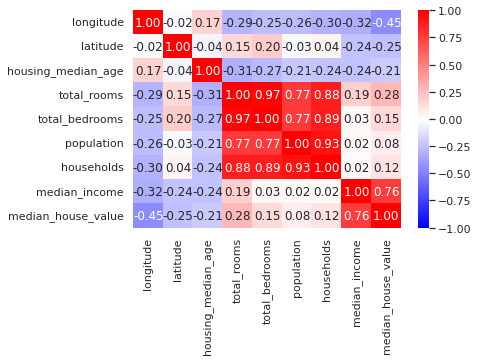

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='bwr', fmt='.2f', vmax=1, vmin=-1, center=0)

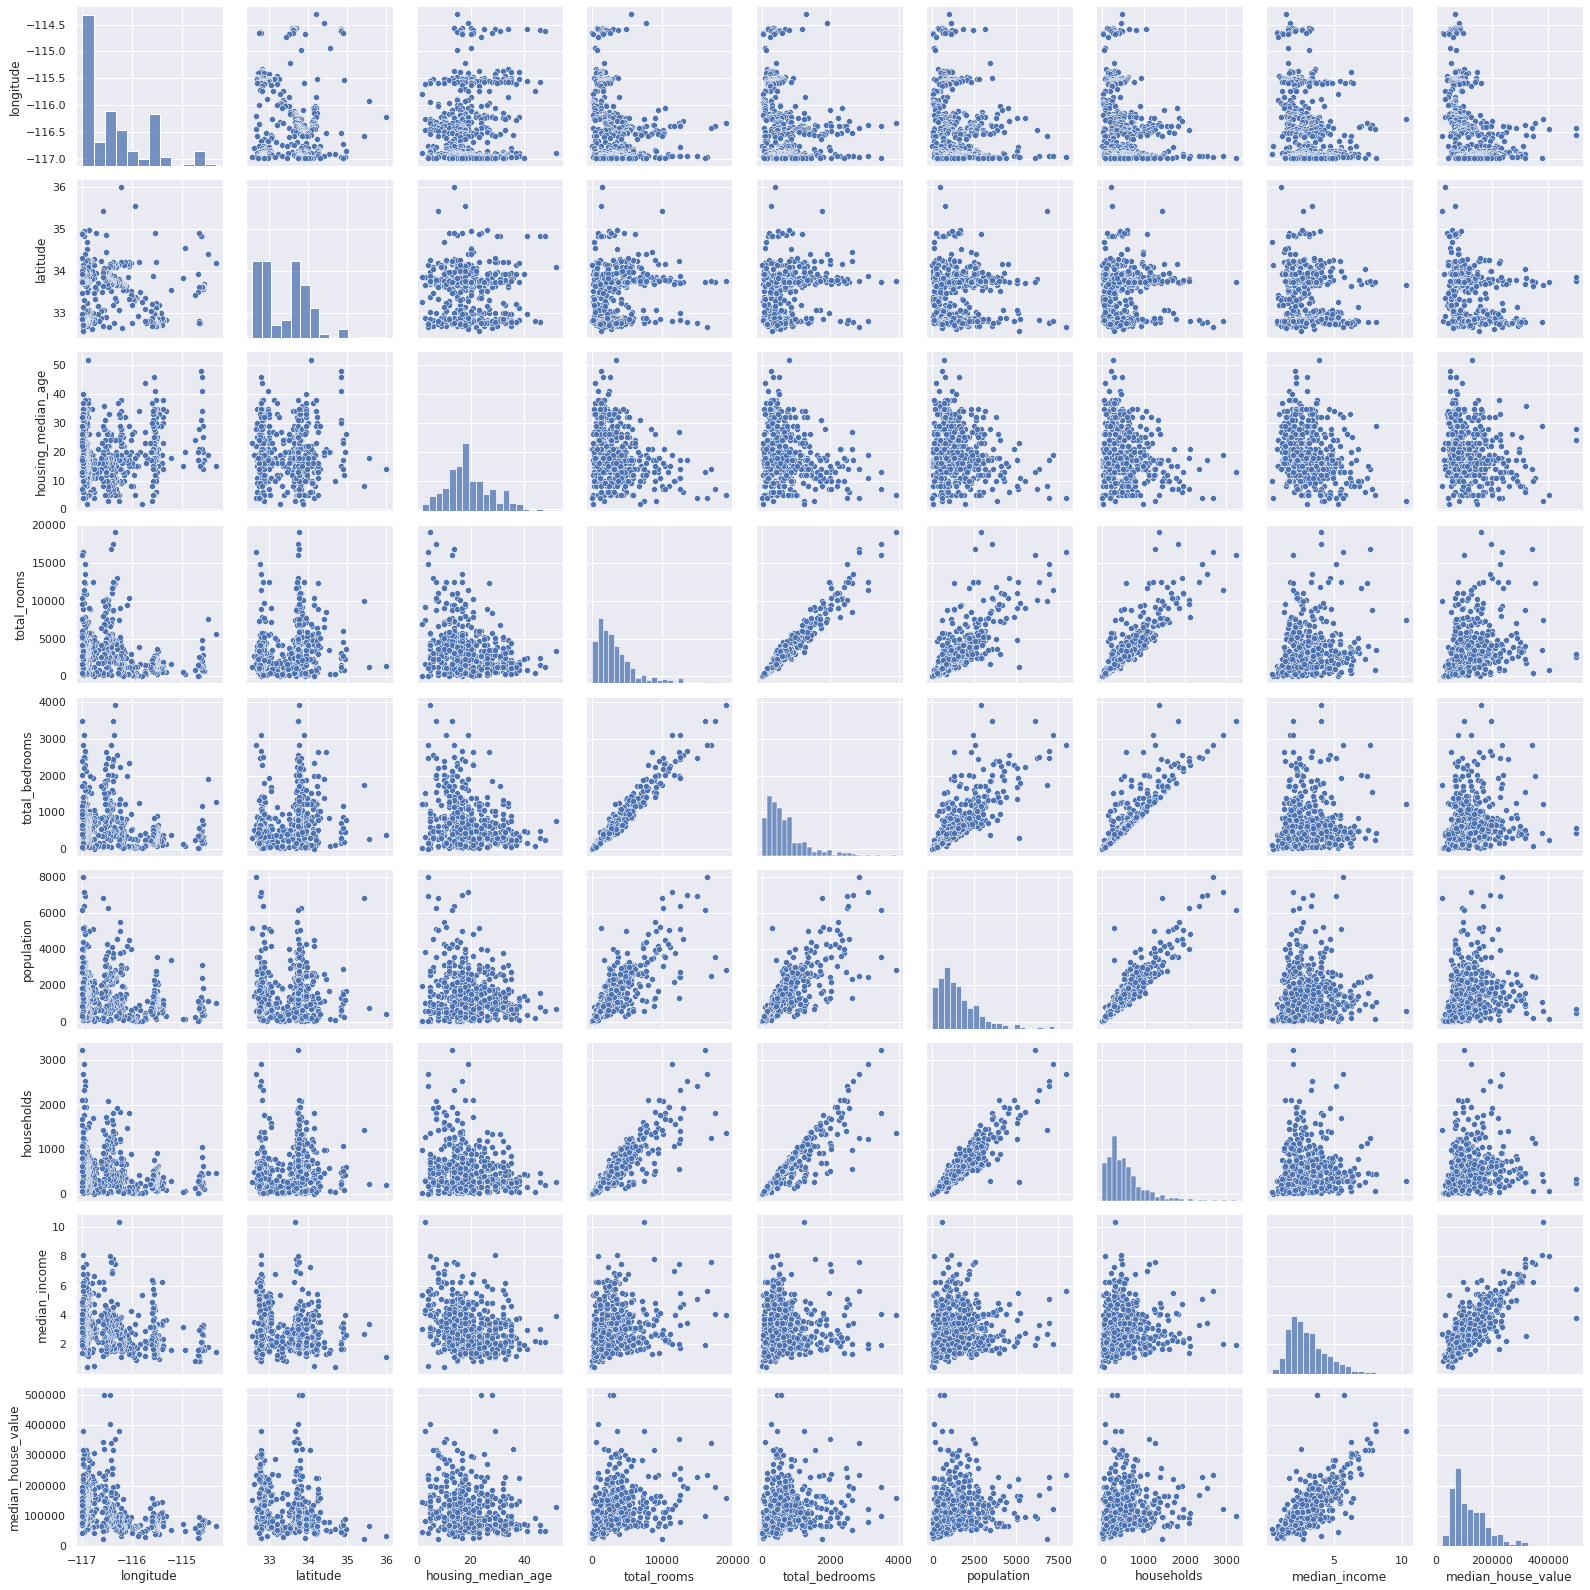

In [31]:
sns.pairplot(df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


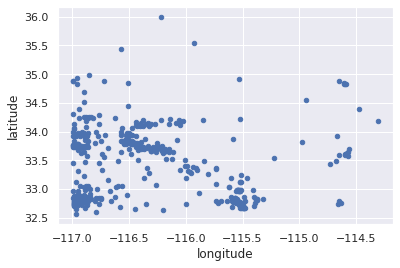

In [32]:
df.plot.scatter('longitude', 'latitude')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


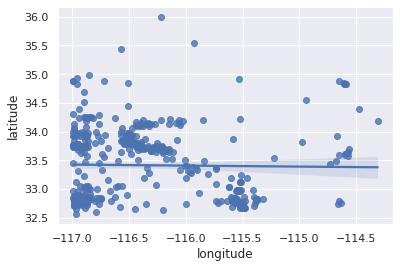

In [33]:
sns.regplot(df['longitude'], df['latitude'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


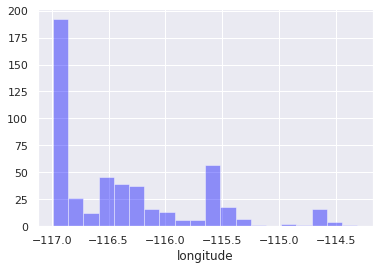

In [34]:
sns.distplot(df['longitude'], kde=False, bins=20, color="blue")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


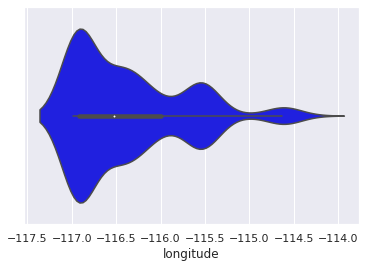

In [35]:
sns.violinplot(df['longitude'], kde=False, bins=20, color="blue")

In [36]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [37]:
df_mhu = df[df['median_house_value'] > 200000]
df_mhl = df[df['median_house_value'] < 200000]

In [38]:
df_mhu.shape, df_mhl.shape

((58, 9), (442, 9))

In [39]:
# 新しいカラムの定義、初期化
df['median_house_value_cat'] = None
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_cat
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,None
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,None
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,None
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,None
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,None
...,...,...,...,...,...,...,...,...,...,...
495,-116.99,33.75,18.0,9601.0,2401.0,4002.0,2106.0,1.4366,77000.0,None
496,-116.99,33.73,13.0,16148.0,3474.0,6159.0,3232.0,1.9961,97800.0,None
497,-116.99,33.46,13.0,1614.0,410.0,846.0,270.0,2.8300,43000.0,None
498,-116.99,32.96,17.0,5509.0,866.0,2748.0,817.0,4.8854,181300.0,None


In [40]:
# median_house_valueの値を基にカテゴリ分け、値を代入
df.loc[df['median_house_value'] >200000, 'median_house_value_cat'] = 'mhu'
df.loc[df['median_house_value'] <200000, 'median_house_value_cat'] = 'mhl'

In [41]:
# カテゴリ分け毎の平均値算出
df.groupby('median_house_value_cat')['median_house_value'].mean()

median_house_value_cat
mhl    103424.208145
mhu    272325.896552
Name: median_house_value, dtype: float64

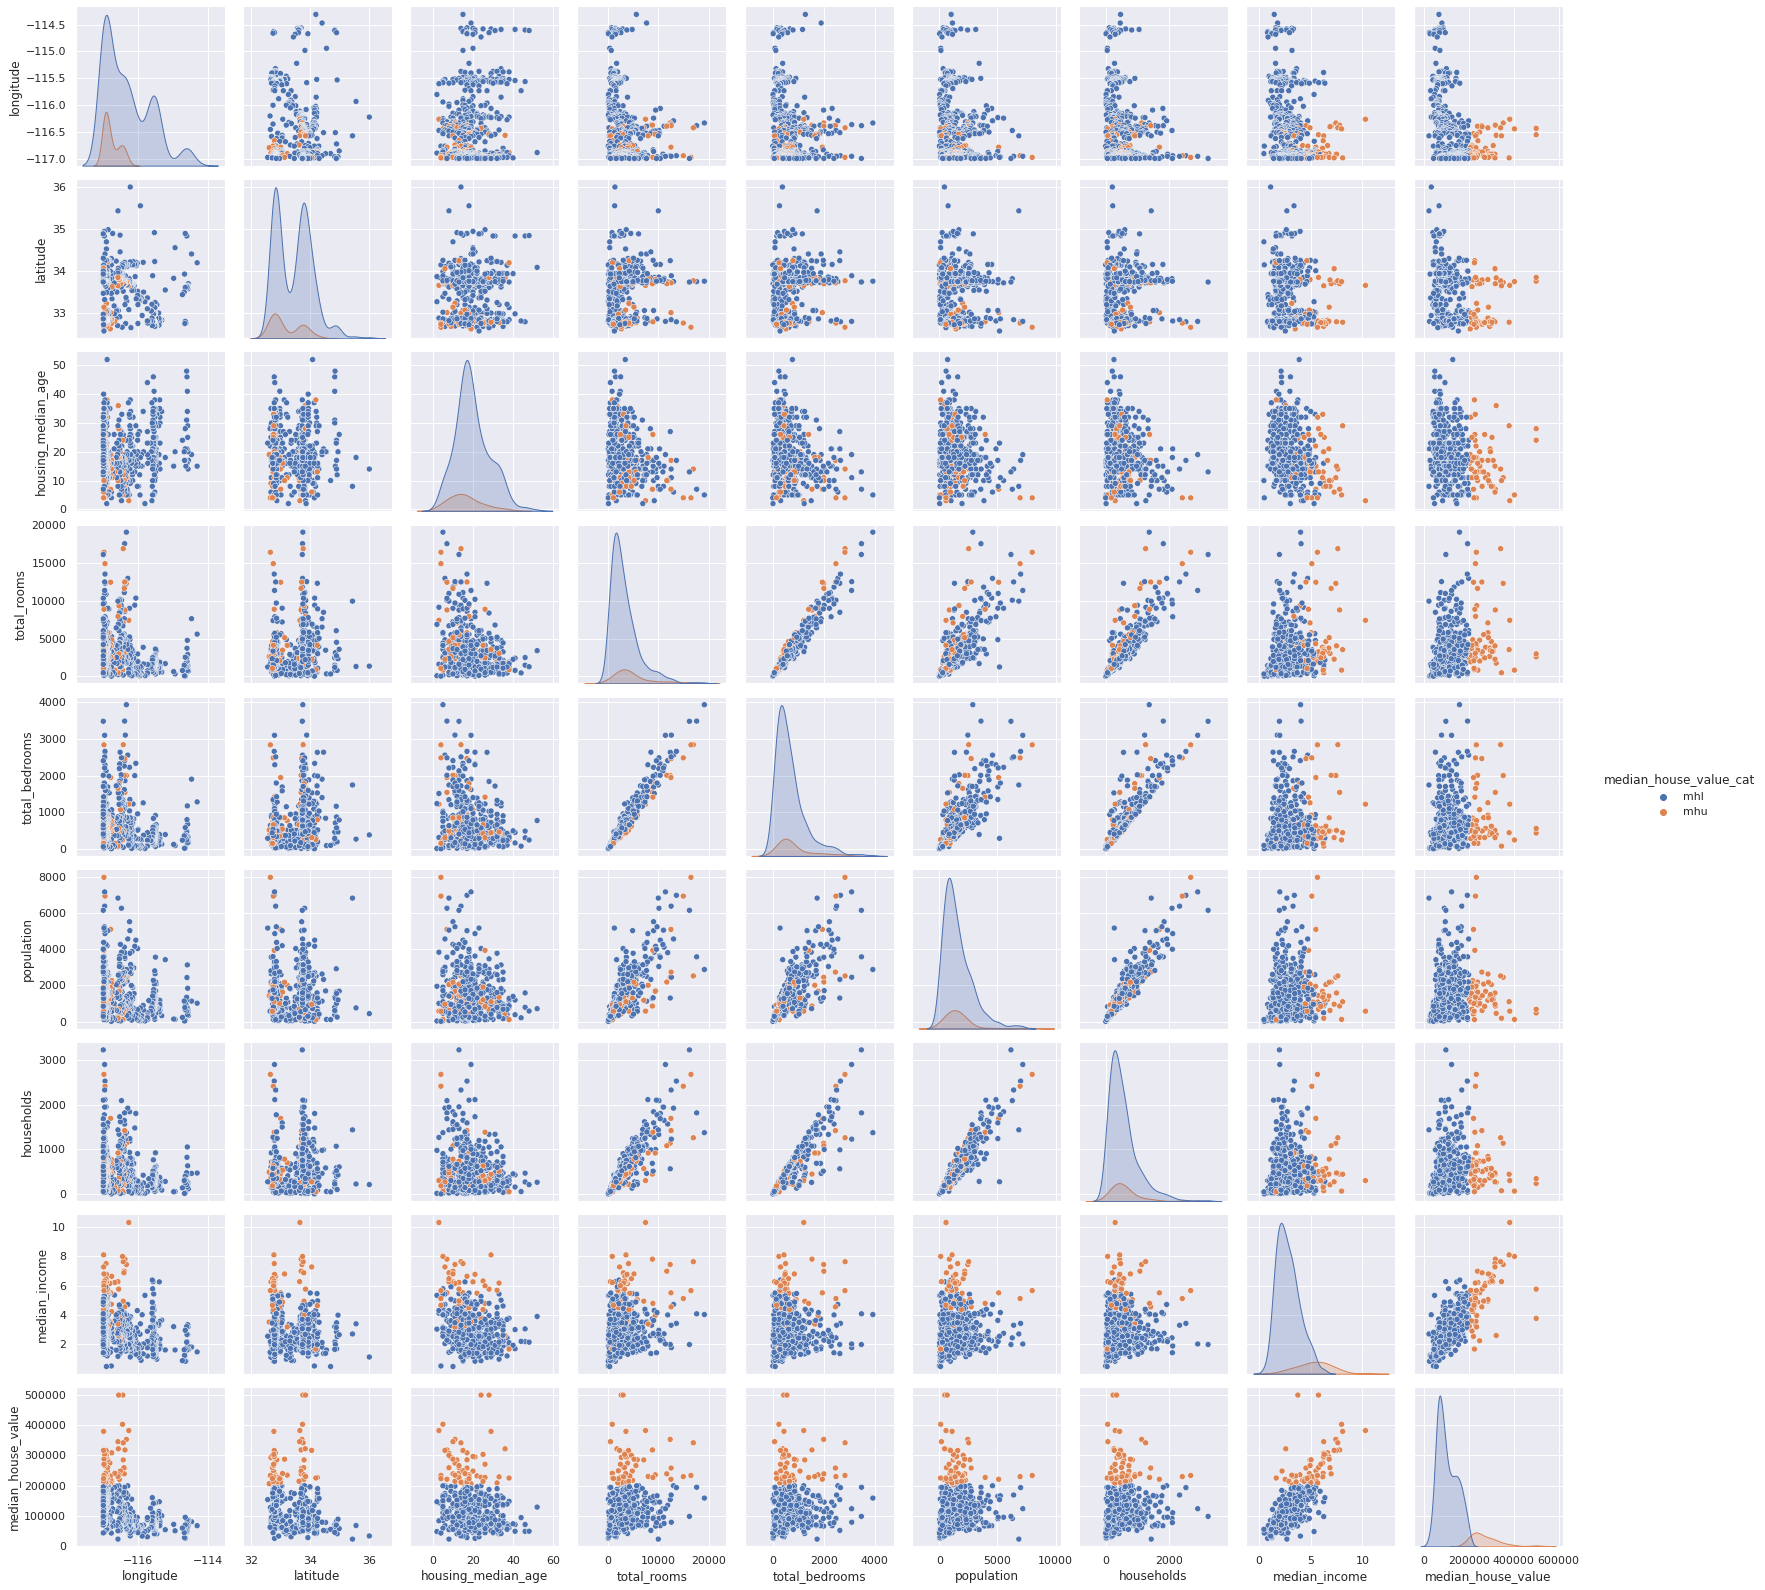

In [42]:
sns.pairplot(data=df, hue = 'median_house_value_cat')